In [2]:
import pandas as pd
fc = pd.read_csv("/gpfs/commons/home/mschertzer/asb_model/220708_all_ipsc_ip/fc/input-rep1_v41_hg38_fc.txt", 
                 sep = "\t", 
                 comment="#")
                 
fc

,Geneid,Chr,Start,End,Strand,Length,/gpfs/commons/home/mschertzer/asb_model/220708_all_ipsc_ip/alignments/input-rep1_merge_Aligned.out.bam
0,ENSG00000223972.5,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,11869;12010;12179;12613;12613;12975;13221;1322...,12227;12057;12227;12721;12697;13052;14409;1337...,+;+;+;+;+;+;+;+;+,1735,2
1,ENSG00000227232.5,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14404;15005;15796;16607;16858;17233;17606;1791...,14501;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1351,57
2,ENSG00000278267.1,chr1,17369,17436,-,68,53
3,ENSG00000243485.5,chr1;chr1;chr1;chr1;chr1,29554;30267;30564;30976;30976,30039;30667;30667;31109;31097,+;+;+;+;+,1021,9
4,ENSG00000284332.1,chr1,30366,30503,+,138,0
...,...,...,...,...,...,...,...
61847,ENSG00000198695.2,chrM,14149,14673,-,525,59390
61848,ENSG00000210194.1,chrM,14674,14742,-,69,598
61849,ENSG00000198727.2,chrM,14747,15887,+,1141,247327
61850,ENSG00000210195.2,chrM,15888,15953,+,66,663


In [14]:
starts = fc.Start.str.split(";", expand=True)[0]
starts

0        11869
1        14404
2        17369
3        29554
4        30366
         ...  
61847    14149
61848    14674
61849    14747
61850    15888
61851    15956
Name: 0, Length: 61852, dtype: object

In [15]:
ends = fc["End"].str.split(";", expand=True)

In [11]:
ends = fc.loc[:,"End"].str.split(";", expand=True)
gene_ends = ends.fillna(-1).astype(int).max(1)

In [12]:
gene_ends

0        14409
1        29570
2        17436
3        31109
4        30503
         ...  
61847    14673
61848    14742
61849    15887
61850    15953
61851    16023
Length: 61852, dtype: int64

In [16]:
chrom = fc.Chr.str.split(";", expand=True)[0]
chrom

0        chr1
1        chr1
2        chr1
3        chr1
4        chr1
         ... 
61847    chrM
61848    chrM
61849    chrM
61850    chrM
61851    chrM
Name: 0, Length: 61852, dtype: object

In [17]:
strand = fc.Strand.str.split(";", expand=True)[0]
strand

0        +
1        -
2        -
3        +
4        +
        ..
61847    -
61848    -
61849    +
61850    +
61851    -
Name: 0, Length: 61852, dtype: object

In [27]:
dat = pd.DataFrame({"chrom":chrom, 
              "start":starts, 
              "end":gene_ends, 
              "gene_id":fc.Geneid,
              "strand" : strand, 
              "counts" : fc.iloc[:,-1], 
              "length" : fc.Length }
              )
dat

,chrom,start,end,gene_id,strand,counts,length
0,chr1,11869,14409,ENSG00000223972.5,+,2,1735
1,chr1,14404,29570,ENSG00000227232.5,-,57,1351
2,chr1,17369,17436,ENSG00000278267.1,-,53,68
3,chr1,29554,31109,ENSG00000243485.5,+,9,1021
4,chr1,30366,30503,ENSG00000284332.1,+,0,138
...,...,...,...,...,...,...,...
61847,chrM,14149,14673,ENSG00000198695.2,-,59390,525
61848,chrM,14674,14742,ENSG00000210194.1,-,598,69
61849,chrM,14747,15887,ENSG00000198727.2,+,247327,1141
61850,chrM,15888,15953,ENSG00000210195.2,+,663,66


In [58]:
dat["fpkm"] = (dat.counts + 0.1) / (totcountM * dat.length/1000)
dat.to_csv("hnrnpk_input_rep1_fc.tsv.gz", sep = "\t", index = False)

In [59]:
dat[dat.fpkm>1.].to_csv("hnrnpk_input_rep1_fc_fpkm1.bed", sep = "\t", index = False, header=False)

Text(0, 0.5, 'Count')

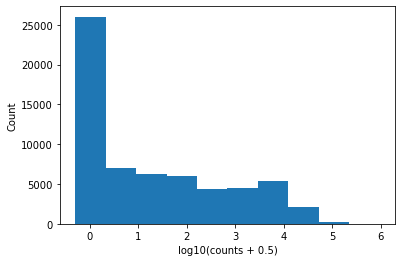

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.log10(dat.counts + 0.5))
plt.xlabel("log10(counts + 0.5)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

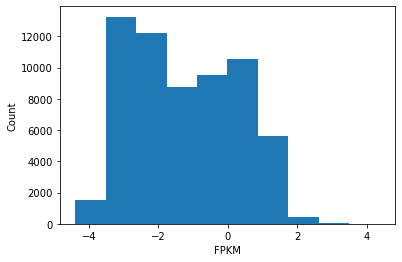

In [56]:
totcountM = dat.counts.sum() / 1e6

plt.hist(np.log10(fpkm))
plt.xlabel("FPKM")
plt.ylabel("Count")

In [52]:
(fpkm > 1.).mean()

0.2670891806247171

In [55]:
((fpkm > 1.) & (dat.counts > 0)).sum() # count threshold is redundant

16520

In [57]:
dat

,chrom,start,end,gene_id,strand,counts,length,fpkm
0,chr1,11869,14409,ENSG00000223972.5,+,2,1735,0.009744
1,chr1,14404,29570,ENSG00000227232.5,-,57,1351,0.340260
2,chr1,17369,17436,ENSG00000278267.1,-,53,68,6.286598
3,chr1,29554,31109,ENSG00000243485.5,+,9,1021,0.071754
4,chr1,30366,30503,ENSG00000284332.1,+,0,138,0.005834
...,...,...,...,...,...,...,...,...
61847,chrM,14149,14673,ENSG00000198695.2,-,59390,525,910.719926
61848,chrM,14674,14742,ENSG00000210194.1,-,598,69,69.783829
61849,chrM,14747,15887,ENSG00000198727.2,+,247327,1141,1745.083235
61850,chrM,15888,15953,ENSG00000210195.2,+,663,66,80.884476


In [30]:
!bedtools subtract -a hnrnpk_input_rep1_fc.bed -b /gpfs/commons/home/daknowles/RIPnet/all_hnrnpk_rep1_stranded.narrowPeak.gz | gzip > unbound_regions.bed.gz

/bin/bash: bedtools: command not found


In [60]:
unbound = pd.read_csv("unbound_regions.bed.gz", sep = "\t", names = ["chrom", "start", "end", "gene", "strand", "counts", "length"])

In [33]:
dat

,chrom,start,end,gene_id,strand,counts,length
0,chr1,11869,14409,ENSG00000223972.5,+,2,1735
1,chr1,14404,29570,ENSG00000227232.5,-,57,1351
2,chr1,17369,17436,ENSG00000278267.1,-,53,68
3,chr1,29554,31109,ENSG00000243485.5,+,9,1021
4,chr1,30366,30503,ENSG00000284332.1,+,0,138
...,...,...,...,...,...,...,...
61847,chrM,14149,14673,ENSG00000198695.2,-,59390,525
61848,chrM,14674,14742,ENSG00000210194.1,-,598,69
61849,chrM,14747,15887,ENSG00000198727.2,+,247327,1141
61850,chrM,15888,15953,ENSG00000210195.2,+,663,66


In [61]:
1

1